# Actividad: Problemas de clasificación 

En este ejercicio trabajarás con el conjunto de datos que se te asignó de acuerdo al último número de tu matrícula (ver las notas del ejercicio). En estos archivos se tienen datos procesados de un experimento de psicología en el que se mide la respuesta cerebral cuando un sujeto presta atención a un estímulo visual que aparece de manera repentina y cuando no presta atención a dicho estímulo visual. Los datos están en archivos de texto, los cuales se cargan con la función loadtxt de numpy

La primera columna corresponde a la clase (1 o 2). La clase 1 representa cuando el sujeto está prestando atención, y la clase 2 cuando no lo hace. La segunda columna se ignora, mientras que el resto de las columnas indican las variables que se calcularon de la respuesta cerebral medida con la técnicas de Electroencefaolografía para cada caso.



In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict
from sklearn.metrics import classification_report, classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import GridSearchCV
import random

In [3]:
#Load database
df = pd.read_csv('/home/alanv/Documents/7/omar/P1_1.txt', delimiter='\t', header=None)
column_names = [f"V{i}" for i in range(1, df.shape[1] + 1)]
df.columns = column_names
df.drop(['V2','V156'],inplace=True,axis=1)
df

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155
0,1,-1.983609,-2.307221,-1.106408,0.125453,0.571937,0.724484,1.005067,0.958374,0.165433,...,-1.437280,-0.052512,1.044647,0.653567,0.286931,1.371024,2.635984,1.972739,-0.191824,-1.405858
1,1,0.819334,-0.187179,-0.604254,0.162191,0.885844,0.279768,-0.972527,-1.170367,-0.190216,...,0.232946,1.205306,0.739159,0.015158,0.549055,1.975111,2.554563,1.585072,0.314870,0.181487
2,1,-0.412824,0.367176,0.585049,0.301655,0.099057,0.049085,-0.317552,-1.146371,-1.836088,...,-0.345102,0.100283,0.071815,-1.020441,-2.019527,-1.743849,-0.693552,-0.224807,-0.620347,-0.973043
3,1,0.392490,-0.255365,0.142369,1.069737,1.562800,1.106500,-0.064497,-1.145345,-1.308064,...,-1.048378,-0.084662,1.100433,1.133709,-0.027949,-1.025664,-0.824307,0.063200,0.425066,-0.015195
4,1,0.501571,-0.337430,-0.697348,0.656165,2.088990,1.504034,-0.465597,-1.391680,-0.611330,...,0.530430,1.530316,1.472383,0.564503,-0.349507,-0.717304,-0.618919,-0.346143,-0.000279,0.337508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,2,-0.443020,0.200899,1.511965,2.073191,1.242577,-0.076725,-0.828760,-1.187531,-1.851632,...,1.840325,3.184403,2.494080,0.940529,0.354632,0.804459,0.921112,0.304525,0.137157,1.066532
1389,2,1.530154,1.070188,0.328849,-0.250447,-0.140749,0.526235,1.015146,0.838786,0.256393,...,-0.174581,-0.328666,-0.530457,-0.620668,-1.003254,-1.711879,-2.078918,-1.650707,-0.799395,-0.114377
1390,2,-0.007095,0.041654,0.069534,0.228875,0.381789,0.223283,-0.327042,-0.882752,-0.847323,...,-0.827518,0.183258,0.991450,0.597160,-0.462990,-0.961375,-0.717605,-0.565029,-0.752179,-0.425400
1391,2,-0.970890,-0.468173,0.797872,1.708848,1.448626,0.512831,-0.025961,0.115387,0.248835,...,-0.229371,-0.172276,-0.056905,-0.007255,-0.380686,-0.994331,-1.169496,-0.726270,-0.288457,-0.317863


    1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

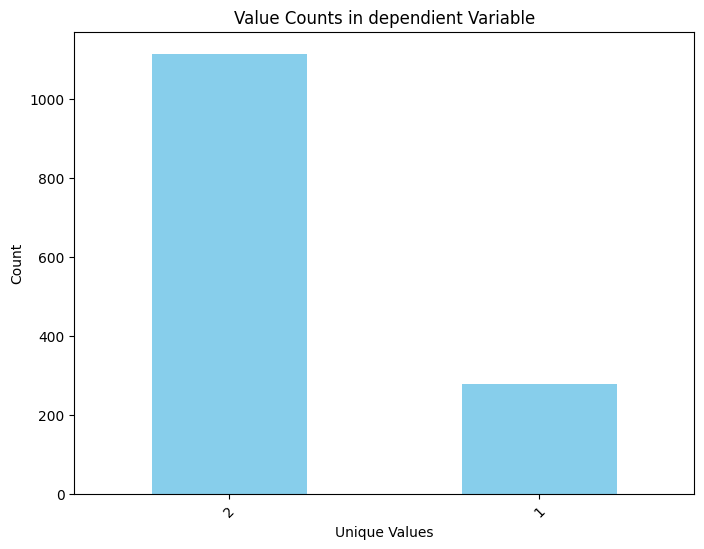

In [8]:
value_counts = df['V1'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts in dependient Variable')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Los datos estan desbalanceados por lo que se opta por balancear por el metodo Weighted loss

    2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [31]:
# Initializate x and y
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [37]:
print("-----  Linear SVM -----")

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear', class_weight='balanced')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))
x.shape

-----  Linear SVM -----
              precision    recall  f1-score   support

           1       0.66      0.87      0.75       278
           2       0.97      0.89      0.93      1115

    accuracy                           0.89      1393
   macro avg       0.81      0.88      0.84      1393
weighted avg       0.91      0.89      0.89      1393



(1393, 153)

In [50]:
print('----- RBF-SVM -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'rbf', class_weight='balanced')
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))) 


----- RBF-SVM -----
              precision    recall  f1-score   support

           1       0.82      0.81      0.81       278
           2       0.95      0.96      0.95      1115

    accuracy                           0.93      1393
   macro avg       0.89      0.88      0.88      1393
weighted avg       0.93      0.93      0.93      1393



In [11]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = DecisionTreeClassifier(class_weight='balanced')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

           1       0.57      0.55      0.56       278
           2       0.89      0.90      0.89      1115

    accuracy                           0.83      1393
   macro avg       0.73      0.72      0.73      1393
weighted avg       0.82      0.83      0.83      1393



In [12]:
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = RandomForestClassifier(class_weight='balanced')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Random Forest -----
              precision    recall  f1-score   support

           1       0.95      0.38      0.55       278
           2       0.87      0.99      0.93      1115

    accuracy                           0.87      1393
   macro avg       0.91      0.69      0.74      1393
weighted avg       0.88      0.87      0.85      1393



In [13]:
print('----- Logistic Regression -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = LogisticRegression(class_weight='balanced')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))



----- Logistic Regression -----
              precision    recall  f1-score   support

           1       0.67      0.85      0.75       278
           2       0.96      0.90      0.93      1115

    accuracy                           0.89      1393
   macro avg       0.81      0.87      0.84      1393
weighted avg       0.90      0.89      0.89      1393



El metodo mas efectivo es el rbf

    3. Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos. 

In [32]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0.01  # Initialize to a small non-zero value

        # Gradient descent for 'num_iterations' iterations
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.2 else 2 for i in y_predicted]  
        return y_predicted_cls

# Declare data
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values


print('----- Logistic Regression No Library-----')

kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = LogisticRegression(learning_rate=0.001, num_iterations=1000)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Logistic Regression No Library-----
              precision    recall  f1-score   support

           1       0.20      0.97      0.33       278
           2       0.56      0.01      0.02      1115

    accuracy                           0.20      1393
   macro avg       0.38      0.49      0.17      1393
weighted avg       0.48      0.20      0.08      1393




    4. Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

Se selecciono el metodo rbf 

----- Optimal selection of number of features -----
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]
---- n features = 1
ACC: 0.764544493437508
---- n features = 2
ACC: 0.7774863979783915
---- n features = 3
ACC: 0.7932363786390242
---- n features = 4
ACC: 0.8082669348392255
---- n features = 5
ACC: 0.8133518991258606
---- n features = 6
ACC: 0.8305639359480157
---- n features = 7
ACC: 0.

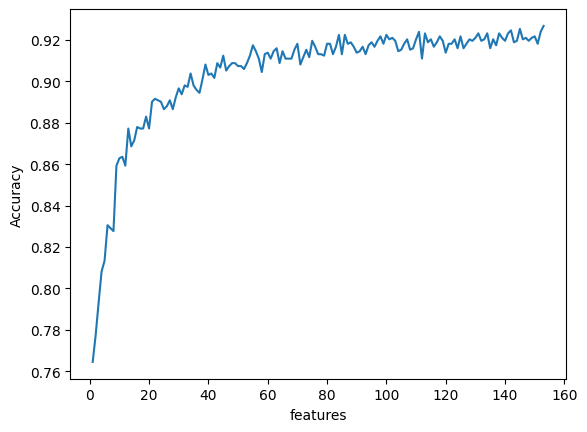

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12' 'x13'
 'x14' 'x15' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23' 'x24' 'x25'
 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x33' 'x34' 'x35' 'x36' 'x37'
 'x38' 'x39' 'x40' 'x41' 'x42' 'x43' 'x44' 'x45' 'x46' 'x47' 'x48' 'x49'
 'x50' 'x51' 'x52' 'x53' 'x54' 'x55' 'x56' 'x57' 'x58' 'x59' 'x60' 'x61'
 'x62' 'x63' 'x64' 'x65' 'x66' 'x67' 'x68' 'x69' 'x70' 'x71' 'x72' 'x73'
 'x74' 'x75' 'x76' 'x77' 'x78' 'x79' 'x80' 'x81' 'x82' 'x83' 'x84' 'x85'
 'x86' 'x87' 'x88' 'x89' 'x90' 'x91' 'x92' 'x93' 'x94' 'x95' 'x96' 'x97'
 'x98' 'x99' 'x100' 'x101' 'x102' 'x103' 'x104' 'x105' 'x106' 'x107'
 'x108' 'x109' 'x110' 'x111' 'x112' 'x113' 'x114' 'x115' 'x116' 'x117'
 'x118' 'x119' 'x120' 'x121' 'x122' 'x123' 'x124' 'x125' 'x126' 'x127'
 'x128' 'x129' 'x130' 'x131' 'x132' 'x133' 'x134' 'x135' 'x136' 'x137'
 'x138' 'x139' 'x140' 'x141' 'x142' 'x143' 'x144' 'x145' 'x146' 'x147'
 'x148' 'x149' 'x150' 'x151' 'x152']


SVC(class_weight='balanced')

In [41]:
# Find optimal number of features using cross-validation filter
################################################################################
print("----- Optimal selection of number of features -----")
n = x.shape[1]  
n_feats = [i for i in range(1, n + 1)]

print(my_array)

acc_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x, y):
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = SVC(kernel = 'rbf', class_weight='balanced')
        fselection_cv = SelectKBest(f_classif, k = n_feat) #SVC(kernel = 'linear')
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)
    
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()
# Fit model with optimal number of features
clf = SVC(kernel = 'rbf', class_weight='balanced')
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
xBestFilter = fselection.get_feature_names_out()
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)


    5. Repite el paso anterior, pero para un método de selección de características de tipo Wrapper.

In [ ]:
print("----- Optimal selection of number of features -----")
n = x.shape[1]  
n_feats = [i for i in range(1, n + 1)]
acc_nfeat = []

for n_feat in n_feats:

    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = SVC(kernel = 'linear')
        fselection_cv = SequentialFeatureSelector(clf_cv,
        n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'rbf', class_weight='balanced')
fselection = SequentialFeatureSelector(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

Este metodo no funciono debido a que se tarda mucho


    6. Repite el paso 4, pero para un método de selección de características de tipo Filter-Wrapper.

In [ ]:
print("----- Optimal selection of number of features -----")
n = x.shape[1]  
n_feats = [i for i in range(1, n + 1)]
acc_nfeat = []

for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(x, y):

        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]
        clf_cv = SVC(kernel = 'linear')
        fselection_cv = RFE(clf_cv, n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(x[test_index, :])
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)

    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)

opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()

# Fit model with optimal number of features
clf = SVC(kernel = 'rbf', class_weight='balanced')
fselection = RFE(clf, n_features_to_select = opt_features)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
x_transformed = fselection.transform(x)
clf.fit(x_transformed, y)

Este metodo no funciono debido a que se tarda mucho

        7. Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:

        Aplica el método de selección de características con todos los datos.
        Ajusta el modelo con las características encontradas.

La unica tecnica de seleccion de carateristicas que funciono con el modelo fue el de filter, con un numero de 153 variables, la cantidad total de variables regresoras, sin embargo para n features de 55 se obtuvo una accurracy de 0.9174415306464507, por lo que se decidio hacer el ejercicio con este numero de variables al ser casi 1/3 de la cantidad mas optima y solo tener una diferencia de menos del 1%

In [48]:
# Fit model with optimal number of features
clf = SVC(kernel = 'rbf', class_weight='balanced')
fselection = SelectKBest(f_classif, k = 55)
fselection.fit(x, y)
print("Selected features: ", fselection.get_feature_names_out())
xBestFilter = fselection.get_feature_names_out()
x_transformed = fselection.transform(x)
#clf.fit(x_transformed, y)
print('----- RBF-SVM -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'rbf', class_weight='balanced')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x_transformed, y):
    # Training phase
    x_train = x_transformed[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = x_transformed[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

Selected features:  ['x11' 'x12' 'x13' 'x14' 'x16' 'x17' 'x18' 'x19' 'x20' 'x21' 'x22' 'x23'
 'x26' 'x27' 'x28' 'x29' 'x30' 'x31' 'x32' 'x38' 'x39' 'x55' 'x56' 'x60'
 'x61' 'x62' 'x64' 'x65' 'x66' 'x67' 'x76' 'x77' 'x78' 'x79' 'x80' 'x81'
 'x82' 'x83' 'x87' 'x88' 'x89' 'x90' 'x91' 'x92' 'x112' 'x113' 'x116'
 'x117' 'x123' 'x124' 'x125' 'x126' 'x127' 'x140' 'x141']
----- RBF-SVM -----
              precision    recall  f1-score   support

           1       0.75      0.83      0.79       278
           2       0.96      0.93      0.94      1115

    accuracy                           0.91      1393
   macro avg       0.86      0.88      0.87      1393
weighted avg       0.92      0.91      0.91      1393



    8. Contesta las siguientes preguntas:

    ¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?

Para este conjunto de datos, los datos están desbalanceados. Si no se aplica una técnica de balanceo, los resultados podrían estar sesgados. En este caso, tenemos casi 5 veces más una clase, por lo tanto, esta tendría una gran precisión, mientras que la otra clase los resultados serían incorrectos. Esto se puede observar en el recall del modelo. Un recall balanceado y alto es lo esperado, aunque la precisión baje. 

    De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.

El clasificador que proporcionó los mejores resultados fue el de RBF, aunque los modelos de regresión logística y lineal también arrojaron resultados considerables. Sin embargo, la regresión logística y lineal tuvieron una baja precisión para la categoría '1'. Esto puede deberse al método que apliqué para el balanceo, ya que solo dio un valor bajo en esa métrica. La efectividad del clasificador RBF podría deberse a que es un modelo no lineal, lo que lo hace más adecuado para el conjunto de datos, especialmente cuando se comparan los resultados con los modelos lineales.

    ¿Es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?

Sí, es posible reducir la dimensionalidad del problema sin perder rendimiento en el modelo, aunque en este conjunto de datos, la mejor dimensionalidad se obtuvo utilizando todas las variables independientes. Sin embargo, al observar la gráfica del método Filter, se puede notar que hay un punto en el cual el número de características deja de aumentar significativamente. En otros conjuntos de datos, reducir la dimensionalidad puede ser beneficioso, ya que disminuye la complejidad del modelo y puede ayudar a evitar el sobreajuste.

    ¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?

Para este caso, el mejor y único método que pude aplicar fue el método Filter, debido a que no depende del modelo en sí, sino de las características de forma independiente. Esto reduce significativamente el costo computacional. Los otros dos métodos, Wrapper y Filter-Wrapper, podrían haberse calculado, pero dado que dependen del modelo, el costo computacional es mucho más alto y podría llevar horas obtener resultados.

    Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?

Hay varias opciones para mejorar el modelo, como esperar el tiempo suficiente para que los métodos Wrapper y Filter-Wrapper proporcionen resultados, además de probar diferentes métodos de balanceo. También se podría evaluar diferentes hiperparámetros, como el número de k vecinos.


# Ejercicio 2

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpy Links to an external site.. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.


In [3]:
#Load database
df = pd.read_csv('/home/alanv/Documents/7/omar/M_4.txt', delimiter='\t', header=None)
#dfA = np.loadtxt('/home/alanv/Documents/7/omar/P1_1.txt')
#dfA.shape (1393, 155)
column_names = [f"V{i}" for i in range(1, df.shape[1] + 1)]
df.columns = column_names
df.drop(['V2','V633'],inplace=True,axis=1)
df

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V623,V624,V625,V626,V627,V628,V629,V630,V631,V632
0,1,1.379487,0.894114,0.597094,-1.114525,0.176757,0.217511,0.957966,0.653276,0.467849,...,1.756593,-0.451745,1.794924,1.176389,-0.581349,1.466926,0.219139,-0.427162,1.545800,1.947798
1,1,-0.086426,0.058724,-0.361846,-1.202523,0.153521,-0.108678,-0.328419,-0.188628,-0.114548,...,0.091445,-0.673981,0.194601,0.247911,-1.135336,0.329500,-0.134775,-0.451924,0.076792,-0.187741
2,1,0.120878,0.279174,-0.076013,-0.602122,-0.666107,-0.630813,-0.271406,0.026564,-0.975923,...,-0.680615,-0.801010,-0.350549,0.302109,-1.757509,0.204798,-1.041059,-0.615934,0.351723,-0.737440
3,1,-0.351626,0.895506,0.354001,-0.984980,0.040372,0.888001,-0.337790,0.090245,0.560630,...,1.047266,-0.775160,1.170296,0.380971,-1.274298,1.070921,-0.134358,-0.370253,1.578293,0.371553
4,1,0.215150,-0.019875,-0.589697,-2.876677,-0.932048,-0.802137,-0.033036,-1.120116,-1.523562,...,-0.344517,-1.042312,-0.053075,0.072212,-1.613424,0.013676,-1.102570,-0.834125,1.310845,-0.121053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,7,-4.764398,-5.173067,-3.162772,-4.354816,-3.841628,-2.819353,-4.607093,-3.640769,-4.109369,...,-5.081282,-2.195790,-3.918950,-5.518796,-6.302458,-4.503126,-6.134198,-1.961771,-3.668271,-3.400192
626,7,-5.315286,-5.195915,-3.281644,-4.474814,-4.960719,-3.396900,-5.018654,-6.814412,-4.903666,...,-5.953465,-1.723648,-4.715917,-5.151268,-7.740101,-6.387718,-7.075405,-1.502264,-3.691837,-6.123619
627,7,-6.609802,-5.108913,-2.907823,-4.461101,-4.676772,-2.563865,-5.459646,-6.554167,-4.501447,...,-5.644879,-1.577503,-5.206570,-5.673828,-7.900117,-8.063860,-6.160683,-1.355751,-3.993137,-5.957840
628,7,-6.376412,-5.977268,-3.832173,-4.736427,-5.609423,-3.827419,-5.697619,-6.528336,-5.751097,...,-6.152191,-1.981974,-6.039118,-5.610517,-7.821325,-7.349157,-7.417253,-1.772635,-4.038534,-5.921882


    1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

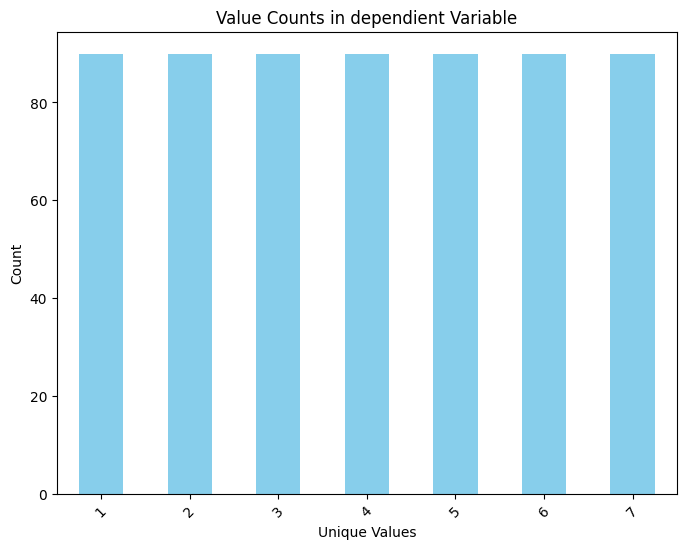

In [5]:
value_counts = df['V1'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Value Counts in dependient Variable')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Viendo estos resultados, los datos no se necesitan balancear

    2. Evalúa al menos 5 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [4]:
# Initializate x and y
x = df.iloc[:, 1:].values
y = df.iloc[:,0].values

In [9]:
print("-----  Linear SVM -----")

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'linear')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


-----  Linear SVM -----
              precision    recall  f1-score   support

           1       0.98      0.97      0.97        90
           2       0.81      0.87      0.84        90
           3       0.93      0.87      0.90        90
           4       0.91      0.91      0.91        90
           5       0.92      0.93      0.93        90
           6       0.98      0.90      0.94        90
           7       0.89      0.96      0.92        90

    accuracy                           0.91       630
   macro avg       0.92      0.91      0.91       630
weighted avg       0.92      0.91      0.91       630



In [10]:
print('----- RBF-SVM -----')

kf = StratifiedKFold(n_splits=5, shuffle = True)
clf = SVC(kernel = 'rbf')
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
    # Training phase
    x_train = x[train_index, :]
    y_train = y[train_index]
    clf.fit(x_train, y_train)
    # Test phase
    x_test = x[test_index, :]
    y_test = y[test_index]
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
    
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred))) 

----- RBF-SVM -----
              precision    recall  f1-score   support

           1       0.97      0.96      0.96        90
           2       0.83      0.86      0.84        90
           3       0.97      0.87      0.92        90
           4       0.89      0.93      0.91        90
           5       0.93      0.92      0.93        90
           6       0.99      0.91      0.95        90
           7       0.88      1.00      0.94        90

    accuracy                           0.92       630
   macro avg       0.92      0.92      0.92       630
weighted avg       0.92      0.92      0.92       630



In [11]:
# Decision tree
print('----- Decision tree -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Decision tree -----
              precision    recall  f1-score   support

           1       0.74      0.74      0.74        90
           2       0.46      0.43      0.45        90
           3       0.66      0.69      0.67        90
           4       0.54      0.58      0.56        90
           5       0.61      0.57      0.59        90
           6       0.53      0.56      0.54        90
           7       0.89      0.87      0.88        90

    accuracy                           0.63       630
   macro avg       0.63      0.63      0.63       630
weighted avg       0.63      0.63      0.63       630



In [12]:
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(x, y):
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = RandomForestClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Random Forest -----
              precision    recall  f1-score   support

           1       0.92      0.89      0.90        90
           2       0.78      0.76      0.77        90
           3       0.91      0.83      0.87        90
           4       0.80      0.86      0.83        90
           5       0.85      0.91      0.88        90
           6       0.93      0.84      0.88        90
           7       0.89      0.99      0.94        90

    accuracy                           0.87       630
   macro avg       0.87      0.87      0.87       630
weighted avg       0.87      0.87      0.87       630



In [28]:
# Standarizise since metod is requesting it
scaler= StandardScaler()
df_estandard=scaler.fit_transform(df.iloc[:, 1:])
df_estandard


array([[ 1.77337996,  1.23806631,  1.39077237, ...,  0.24421788,
         1.03584738,  1.36823187],
       [ 1.04505347,  0.77973814,  0.58552029, ...,  0.19442159,
         0.22911131,  0.36371337],
       [ 1.14805112,  0.90068564,  0.82554263, ..., -0.13540931,
         0.38009527,  0.10514503],
       ...,
       [-2.19602907, -2.05543574, -1.55241885, ..., -1.62321124,
        -2.00597423, -2.35043577],
       [-2.0800714 , -2.53185053, -2.32862493, ..., -2.46158228,
        -2.03090459, -2.33352179],
       [-1.68792863, -2.35529938, -1.48332403, ..., -0.92043493,
        -2.23327903, -2.38790727]])

In [29]:
print('----- Logistic Regression -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []
for train_index, test_index in kf.split(df_estandard, y):
    x_train = df_estandard[train_index, :]
    y_train = y[train_index]
    x_test = df_estandard[test_index, :]
    y_test = y[test_index]
    clf = LogisticRegression()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)
print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Logistic Regression -----


/home/alanv/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alanv/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        90
           2       0.79      0.81      0.80        90
           3       0.93      0.86      0.89        90
           4       0.90      0.93      0.92        90
           5       0.92      0.92      0.92        90
           6       0.96      0.91      0.94        90
           7       0.87      0.93      0.90        90

    accuracy                           0.90       630
   macro avg       0.90      0.90      0.90       630
weighted avg       0.90      0.90      0.90       630



/home/alanv/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [26]:

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear'],  # Use only the linear kernel
    'class_weight': [None, 'balanced'],  # Class weight options
}

# Create the SVM classifier
clf = SVC()

# Create the GridSearchCV object, cv = cross validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='f1_macro') 

# Perform the grid search
grid_search.fit(x, y)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Print the classification report for the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x)
print("Classification Report:")
print(classification_report(y, y_pred))


Best Parameters: {'C': 0.01, 'class_weight': None, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        90
           3       1.00      0.97      0.98        90
           4       1.00      1.00      1.00        90
           5       1.00      1.00      1.00        90
           6       1.00      0.98      0.99        90
           7       0.95      1.00      0.97        90

    accuracy                           0.99       630
   macro avg       0.99      0.99      0.99       630
weighted avg       0.99      0.99      0.99       630



In [12]:
# Define the hyperparameter grid to search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['rbf'],  # Use only the rbf kernel
    'class_weight': [None, 'balanced'],  # Class weight options
}

# Create the SVM classifier
clf = SVC()

# Create the GridSearchCV object, cv = cross validation
grid_search = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 100)}, cv = 5)
# Perform the grid search
grid_search.fit(x, y)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Print the classification report for the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x)
print("Classification Report:")
print(classification_report(y, y_pred))

Best Parameters: {'n_neighbors': 13}
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.96      0.94        90
           2       0.81      0.87      0.84        90
           3       0.96      0.89      0.92        90
           4       0.90      0.84      0.87        90
           5       0.93      0.92      0.93        90
           6       0.96      0.89      0.92        90
           7       0.88      1.00      0.94        90

    accuracy                           0.91       630
   macro avg       0.91      0.91      0.91       630
weighted avg       0.91      0.91      0.91       630



    4. Prepara tus modelos para producción haciendo lo siguiente:

    Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
    Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.


In [29]:
# Evaluation with cross_val_predict
################################################################################
print("----- Model evaluation with cross_val_predict -----")
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 100)}, cv = 5)
y_pred = cross_val_predict(clf, x, y, cv = 5)
print(classification_report(y, y_pred))

----- Model evaluation with cross_val_predict -----


              precision    recall  f1-score   support

           1       0.93      0.91      0.92        90
           2       0.71      0.81      0.76        90
           3       0.90      0.84      0.87        90
           4       0.84      0.80      0.82        90
           5       0.92      0.86      0.89        90
           6       0.90      0.83      0.87        90
           7       0.88      1.00      0.94        90

    accuracy                           0.87       630
   macro avg       0.87      0.87      0.87       630
weighted avg       0.87      0.87      0.87       630



In [28]:
# Production model
################################################################################
print("----- Production model -----")
clf = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 100)}, cv =
5)
clf.fit(x, y)
print(clf.best_estimator_)

----- Production model -----
KNeighborsClassifier(n_neighbors=13)


    5. Contesta lo siguientes:

    ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?
No se observa un problema de balanceo. Al graficar la cantidad de variables regresoras, todas tienen un valor similar. Además, cuando se prueban los modelos sin un método para corregir el desbalanceo, el valor del recall es alto y parecido entre todas las categorías.

    ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

Los mejores modelos fueron el RBF y el de regresión logística. Sin embargo, el modelo de regresión logística dio algunos warnings y se tuvieron que estandarizar los datos, como lo pedía la librería. Estos problemas persistieron debido a que este método se utiliza regularmente para clasificar entre dos categorías, pero al tener 7, podría causar conflictos al tratar de implementar otro método que lo permite, como Softmax.

    ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

Sí, hay una mejora importante al modificar el hiperparámetro de regularización (C). No es el resultado que esperaba, ya que da resultados casi perfectos, entre 0.99 y 1. Esto puede deberse a un sobreajuste, por lo que decidí utilizar el hiperparámetro de k vecinos, donde se obtiene un resultado ligeramente mejor que los anteriores modelos y un número de vecinos que se encuentra en un rango aceptable, considerando que el modelo tiene una variabilidad no muy grande.

    ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?

Uno de los mayores inconvenientes es el sobreajuste, ya que se entrena muy bien el modelo, pero solo para los datos del dataset. Cuando el modelo está en producción y se introducen nuevos datos, el modelo podría dar errores debido a que solo es bueno con los datos con los que fue entrenado.
